# Pandas Cookbook

`Pandas` is a Python package with extensive data management and analysis functionality.  In this section, we will review a handful of practical techniques for taking advantage of `Pandas` capabilities. This is not intended to be an exhaustive review of `Pandas`; rather, we focus instead on using `Pandas` to perform common data management and analysis tasks. There are excellent resources on `pandas` online, starting with the official site, https://pandas.pydata.org.  An [excellent 10-minute tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) for `pandas` beginners is also available online.

Central to `Pandas` is the `DataFrame` object, which holds rectangular collections of data (rows and columns - think of an Excel spreadsheet).  It is a table of data, and `Pandas` provides a number of methods and objects for manipulating and analyzing this data.

In this cookbook, we focus on providing recipes for the following common `pandas` tasks:

1. Reading and writing data from a CSV or Excel file.
2. Creating a Pandas dataframe from data
3. Extracting rows, columns of data from a Dataframe
4. Filtering Datasets with a Query
5. Sorting Data in a Dataframe

## Reading/writing data from/to a file

Pandas provides a set of high-level functions for reading and writing data files in several common formats, perhaps most helpfully, CSV (comma-separated values) and Microsoft Excel files.  In all of the cases below, data is read into a `DataFrame` object, rows and columns of data, including labels.  The `DataFrame` object exposes a number of methods we will take advange of below, but let's start with getting a `DataFrame` filled with data from a file.

The `read_csv` and `read_excel` functions used below have many additional options - see the documents at:

* [`read_csv()`documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [`read_excel()`documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [1]:
import pandas as pd

# read a local CSV file
#df = pd.read_csv( '/somepath/somefile.csv' )

# read from a web url
#df = pd.read_csv( "http://somewhere.com/somedataset.csv")

# some options - change field delimiter
#              - skip top two rows before reading header, data
#              - only get columns 0, 3 and 4
#df = pd.read_csv( '/somepath/somefile.txt', sep=' ', skiprows=2, usecols=(0,3,4))

# some more options - interpret'Date" field as 'date' type
#              - tell it that our dates have the date first instead of the month first
#              - set the index to be the 'Date' column
#df = pd.read_csv( '/somepath/somefile.txt', parse_dates=['Date'], dayfirst=True, index_col='Date' )

# using excel instead csv/text file
#df = pd.read_excel( '/somepath/somefile.xlsx')   # all the option above apply here as well
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/data/PandasExample.xlsx")   # from a web address
print(df)

# ---- Saving data ----

# save as CSV (see docs for options)
#df.to_csv('somefile.csv')

# save as Excel (see docs for options)
#df.to_excel('somefile.xlsx')

   StationID       Date  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
0   14166000 2000-10-05   44.2704  236.82629                 6480       11.71220             14.4
1   14166000 2000-10-06   44.2704  236.82629                 6390        9.79153             14.6
2   14166000 2000-10-07   44.2704  236.82629                 6450        9.85095             14.7
3   14166000 2000-10-08   44.2704  236.82629                 6430       11.53120             14.6
4   14166000 2000-10-09   44.2704  236.82629                 6630       12.19230             14.6


## Creating a `DataFrame` from arrays of data


In [2]:
import pandas as pd

years = [2010,2011,2012,2013,2014]
fireArea = [1.455,2.433,1.665,4.344,5.1243]

# merge the two lists into pairs of data
dataset = list(zip(years,fireArea))
print('Zipped list: ', dataset)

df = pd.DataFrame(data=dataset, columns=['Years','Fire Area'])
print( '\nDataFrame:')
print(df)
# save as a csv file.  See docs for options 
#df.to_csv('somefilename.csv')  

Zipped list:  [(2010, 1.455), (2011, 2.433), (2012, 1.665), (2013, 4.344), (2014, 5.1243)]

DataFrame:
   Years  Fire Area
0   2010     1.4550
1   2011     2.4330
2   2012     1.6650
3   2013     4.3440
4   2014     5.1243


## Getting Columns of Data from a `DataFrame`
We can extract a column of data from a dataframe using the column label as a dictionary key (using bracket ([]) notation, returning a column of data (along with an index, of one exists for the `DataFrame`). The data is return into a pandas `Series` object, which is basically a wrapper around a numpy `array`.  

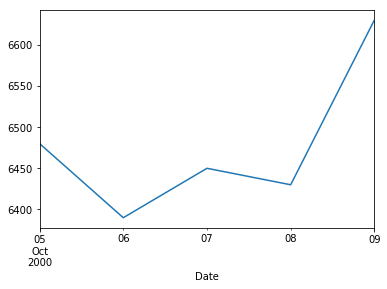

In [4]:
import pandas as pd

# get some data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/data/PandasExample.xlsx", parse_dates=['Date'], index_col='Date')   # from a web address

stationIDs = df['StationID']
discharges = df['StreamDischarge_cfs']

# get the underlying numpy array
d_array = discharges.values

# we can also plot the data!  Note that the x axis takes advantage of the index we specified above.
discharges.plot()

## Examining `DataFrame` objects and extracting rows, columns of data  


Column names
Index(['StationID', 'Latitude', 'Longitude', 'StreamDischarge_cfs',
       'MeanAirTemp_C', 'MaxStreamTemp_C'],
      dtype='object')

First few rows
            StationID  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
Date                                                                                           
2000-10-05   14166000   44.2704  236.82629                 6480       11.71220             14.4
2000-10-06   14166000   44.2704  236.82629                 6390        9.79153             14.6
2000-10-07   14166000   44.2704  236.82629                 6450        9.85095             14.7

First few rows of "StationID"
Date
2000-10-05    14166000
2000-10-06    14166000
2000-10-07    14166000

Multiple columns
            StationID  StreamDischarge_cfs
Date                                      
2000-10-05   14166000                 6480
2000-10-06   14166000                 6390
2000-10-07   14166000                 6450


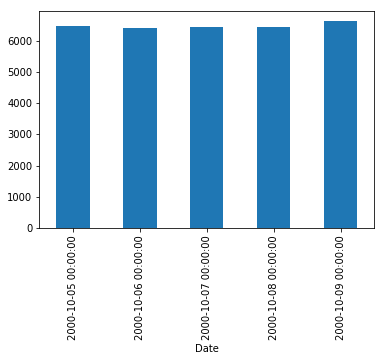

In [19]:
import pandas as pd

# get some data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/data/PandasExample.xlsx",
                   parse_dates=['Date'], index_col='Date')   # from a web address

# print column names
print( "Column names")
print( df.columns)

# print the first few rows (using slicing)
print('\nFirst few rows')
print( df[:3].to_string() )

# print first few rows of a given column 
print('\nFirst few rows of "StationID"')
print( df['StationID'][:3].to_string() )

# get multiple columns.  NOTE the columns names are in a list inside the indexer []s
print('\nMultiple columns')
print( df[['StationID','StreamDischarge_cfs']][:3].to_string() )

# and a bar chart!
df['StreamDischarge_cfs'].plot(kind='bar')


## Filtering rows in a Dataframe (using `.query()`)

In [23]:
import pandas as pd

# get some data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/data/PandasExample.xlsx",
                   parse_dates=['Date'], index_col='Date')   # from a web address

# print the full dataframe
print("\n\n-- Full DataFrame  ------------------------------------\n")
print(df.to_string())

# filter to only queries that have MeanAirTemps greater than 10C
print("\n\n-- Filtered (MeanAirTemp>10) --------------------------\n")
print(df.query('MeanAirTemp_C > 10').to_string())
               
# the next example show "chained" query statements
print("\n\n-- Filtered (MeanAirTemp>10 and MaxStreamTemp>14.5) ---\n")
df1 = df.query('MeanAirTemp_C > 10').query('MaxStreamTemp_C > 14.5')
print( df1.to_string())

# the next example shows usage of pandas boolean operators in the query string  
print("\n\n-- Filtered (MeanAirTemp>10 and MaxStreamTemp<14.5) ---\n")
df2 = df.query('MeanAirTemp_C > 10 & MaxStreamTemp_C < 14.5')
print(df2.to_string())



-- Full DataFrame  ------------------------------------

            StationID  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
Date                                                                                           
2000-10-05   14166000   44.2704  236.82629                 6480       11.71220             14.4
2000-10-06   14166000   44.2704  236.82629                 6390        9.79153             14.6
2000-10-07   14166000   44.2704  236.82629                 6450        9.85095             14.7
2000-10-08   14166000   44.2704  236.82629                 6430       11.53120             14.6
2000-10-09   14166000   44.2704  236.82629                 6630       12.19230             14.6


-- Filtered (MeanAirTemp>10) --------------------------

            StationID  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
Date                                                                                           
2000-10-05   14166

##  Sorting Dataframes (using `.sort()`)

In [24]:
import pandas as pd

# get some data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/data/PandasExample.xlsx",
                   parse_dates=['Date'], index_col='Date')   # from a web address

# print the full dataframe
print("\n\n-- Full DataFrame  ------------------------------------\n")
print(df.to_string())

# sort based on stream discharge
dfSorted = df.sort_values(by=['StreamDischarge_cfs'],ascending=True)
print("\n\n-- Sorted by Stream Discharge --------------------------\n")
print(dfSorted.to_string())




-- Full DataFrame  ------------------------------------

            StationID  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
Date                                                                                           
2000-10-05   14166000   44.2704  236.82629                 6480       11.71220             14.4
2000-10-06   14166000   44.2704  236.82629                 6390        9.79153             14.6
2000-10-07   14166000   44.2704  236.82629                 6450        9.85095             14.7
2000-10-08   14166000   44.2704  236.82629                 6430       11.53120             14.6
2000-10-09   14166000   44.2704  236.82629                 6630       12.19230             14.6


-- Sorted by Stream Discharge --------------------------

            StationID  Latitude  Longitude  StreamDischarge_cfs  MeanAirTemp_C  MaxStreamTemp_C
Date                                                                                           
2000-10-06   1416